In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd
import requests
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [2]:
monthlyUnemployment=pd.read_csv('unemploymentOECD_monthly.csv')
monthlyUnemployment
usefulMonthlyUnemployment=monthlyUnemployment[['LOCATION','TIME','Value']]

In [3]:
url ='https://raw.githubusercontent.com/tm19784/tm19784.github.io/main/jsonFolder/rawPriceBTC.json'
html = requests.get(url)

In [4]:
Bitcoin_price_json = html.json()
BTC=pd.DataFrame(Bitcoin_price_json)
BTC_useful=BTC[['time_close','price_close']]
BTC_useful

,time_close,price_close
0,2015-04-29T16:21:00.0000000Z,146.12
1,2015-05-09T20:13:18.0000000Z,154.44
2,2015-05-19T22:52:30.5100000Z,149.86
3,2015-05-29T19:45:01.0000000Z,154.88
4,2015-06-08T22:20:07.0000000Z,149.16
...,...,...
238,2021-11-03T23:59:59.1590000Z,45971.73
239,2021-11-13T23:59:53.8400240Z,48097.75
240,2021-11-23T23:59:57.5870000Z,43078.60
241,2021-12-03T23:59:57.3880000Z,40643.28


In [5]:
BTC_useful['time_close'] = pd.to_datetime(BTC_useful['time_close'])
BTC_useful
BTC_monthly = BTC_useful.set_index('time_close').resample('1M').mean().reset_index()[-77:].reset_index()
BTC_monthly

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,index,time_close,price_close
0,4,2015-08-31 00:00:00+00:00,162.856667
1,5,2015-09-30 00:00:00+00:00,154.576667
2,6,2015-10-31 00:00:00+00:00,172.750000
3,7,2015-11-30 00:00:00+00:00,230.236667
4,8,2015-12-31 00:00:00+00:00,290.226667
...,...,...,...
72,76,2021-08-31 00:00:00+00:00,32926.090000
73,77,2021-09-30 00:00:00+00:00,33857.720000
74,78,2021-10-31 00:00:00+00:00,40583.986667
75,79,2021-11-30 00:00:00+00:00,45716.026667


In [6]:
usefulMonthlyUnemployment['TIME'] = pd.to_datetime(usefulMonthlyUnemployment['TIME'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [7]:
Turkey_usefulMonthlyUnemployment = usefulMonthlyUnemployment[usefulMonthlyUnemployment['LOCATION'].str.contains('TUR')]
Turkey_usefulMonthlyUnemployment.reset_index()

,index,LOCATION,TIME,Value
0,1850,TUR,2015-09-01,10.2
1,1851,TUR,2015-10-01,10.2
2,1852,TUR,2015-11-01,10.2
3,1853,TUR,2015-12-01,10.4
4,1854,TUR,2016-01-01,10.2
...,...,...,...,...
68,1918,TUR,2021-05-01,12.6
69,1919,TUR,2021-06-01,10.6
70,1920,TUR,2021-07-01,11.9
71,1921,TUR,2021-08-01,11.8


In [8]:
Turkey_BTC = Turkey_usefulMonthlyUnemployment.reset_index()[['LOCATION', 'TIME', 'Value']].join(BTC_monthly)
Turkey_BTC

,LOCATION,TIME,Value,index,time_close,price_close
0,TUR,2015-09-01,10.2,4,2015-08-31 00:00:00+00:00,162.856667
1,TUR,2015-10-01,10.2,5,2015-09-30 00:00:00+00:00,154.576667
2,TUR,2015-11-01,10.2,6,2015-10-31 00:00:00+00:00,172.750000
3,TUR,2015-12-01,10.4,7,2015-11-30 00:00:00+00:00,230.236667
4,TUR,2016-01-01,10.2,8,2015-12-31 00:00:00+00:00,290.226667
...,...,...,...,...,...,...
68,TUR,2021-05-01,12.6,72,2021-04-30 00:00:00+00:00,41446.516667
69,TUR,2021-06-01,10.6,73,2021-05-31 00:00:00+00:00,33007.263333
70,TUR,2021-07-01,11.9,74,2021-06-30 00:00:00+00:00,25347.843333
71,TUR,2021-08-01,11.8,75,2021-07-31 00:00:00+00:00,24324.596667


In [9]:
Turkey_BTC.rename(columns={'Value': 'Turkey_unemployment_rate'}, inplace=True)
Turkey_BTC.rename(columns={'price_close': 'BTC_closing_price'}, inplace=True)

In [10]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import seaborn as sns
sns.set()

In [11]:
Turkey_BTC_correlation = Turkey_BTC[['Turkey_unemployment_rate','BTC_closing_price']]
Turkey_BTC.to_csv('Turkey_BTC.csv')
Turkey_Bitcoin_correlation = pd.read_csv('Turkey_BTC.csv')

[Text(0.5, 1.0, 'Regression of closing price of Bitcoin on unemployment rate of Turkey')]

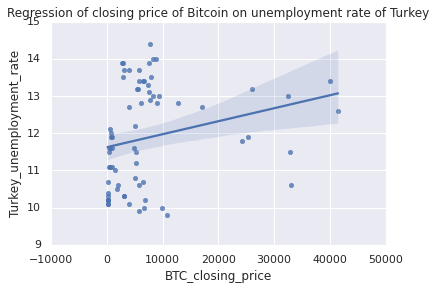

In [12]:
sns.regplot(x='BTC_closing_price',y='Turkey_unemployment_rate',data=Turkey_Bitcoin_correlation).set(title='Regression of closing price of Bitcoin on unemployment rate of Turkey')

In [13]:
from scipy.stats import linregress

In [14]:
slope, intercept, rvalue, pvalue, stderr = linregress(x=Turkey_Bitcoin_correlation.dropna()['BTC_closing_price'], y=Turkey_Bitcoin_correlation.dropna()['Turkey_unemployment_rate'])

In [15]:
regression_equation = print('y = ',np.round(slope,2),' * x + ',np.round(intercept,2))
regression_R2 = print('R² = ',np.round(rvalue**2,2))

y =  0.0  * x +  11.62
R² =  0.06


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  


Text(0.5, 1.0, 'Relationship between Bitcoin price and Japanese unemployment')

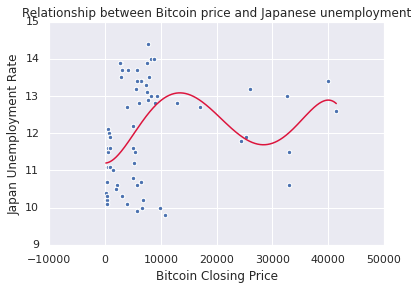

In [16]:
x = Turkey_Bitcoin_correlation.dropna()['BTC_closing_price']
y = Turkey_Bitcoin_correlation.dropna()['Turkey_unemployment_rate']

poly_model = make_pipeline(PolynomialFeatures(5),
                           LinearRegression())
poly_model.fit(x[:, np.newaxis], y)
xfit = np.linspace(min(x), max(x), 1000)
yfit = poly_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit,color='crimson');
plt.xlabel('Bitcoin Closing Price')
plt.ylabel('Japan Unemployment Rate')
plt.title('Relationship between Bitcoin price and Japanese unemployment')

In [17]:
df_fitz = pd.DataFrame(xfit,yfit)
df_fitz.rename({'index':'yfit'}, inplace=True)
df_fitz_2 = df_fitz.reset_index()
df_fitz_2.rename(columns={'index':'yfit'}, inplace=True)
df_fitz_2.rename(columns={0:'xfit'}, inplace=True)
df_fitz_2

,yfit,xfit
0,11.198548,154.576667
1,11.199240,195.909940
2,11.200089,237.243213
3,11.201095,278.576486
4,11.202256,319.909760
...,...,...
995,12.818144,41281.183574
996,12.813061,41322.516847
997,12.807786,41363.850120
998,12.802316,41405.183393


In [18]:
Regression_output_table = pd.concat([Turkey_Bitcoin_correlation, df_fitz_2])
Regression_output_table.head(85)

,Unnamed: 0,LOCATION,TIME,Turkey_unemployment_rate,index,time_close,BTC_closing_price,yfit,xfit
0,0.0,TUR,2015-09-01,10.2,4.0,2015-08-31 00:00:00+00:00,162.856667,NaN,NaN
1,1.0,TUR,2015-10-01,10.2,5.0,2015-09-30 00:00:00+00:00,154.576667,NaN,NaN
2,2.0,TUR,2015-11-01,10.2,6.0,2015-10-31 00:00:00+00:00,172.750000,NaN,NaN
3,3.0,TUR,2015-12-01,10.4,7.0,2015-11-30 00:00:00+00:00,230.236667,NaN,NaN
4,4.0,TUR,2016-01-01,10.2,8.0,2015-12-31 00:00:00+00:00,290.226667,NaN,NaN
...,...,...,...,...,...,...,...,...,...
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.206647,443.909580
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.208409,485.242853
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.210316,526.576126
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.212367,567.909399


In [19]:
Regression_output_table.to_csv('Regression_output_TUR_BTC.csv')